<a href="https://colab.research.google.com/github/0v3r-9000/trc204.github.io/blob/main/Newborn_Health_Risk%20/%20Newborn_Monitoring_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
miadul_newborn_health_monitoring_dataset_path = kagglehub.dataset_download('miadul/newborn-health-monitoring-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'newborn-health-monitoring-dataset' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newborn-health-monitoring-dataset/newborn_health_monitoring_with_risk.csv


In [3]:
import os

df = pd.read_csv(os.path.join(miadul_newborn_health_monitoring_dataset_path, 'newborn_health_monitoring_with_risk.csv'))

In [4]:
import os

# List the contents of the downloaded directory
print(os.listdir(miadul_newborn_health_monitoring_dataset_path))

['newborn_health_monitoring_with_risk.csv']


In [5]:
df.head(3)

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy


In [6]:
# List unique values for the 'name' column
unique_names = df['feeding_type'].unique()
display(unique_names)

array(['Formula', 'Breastfeeding', 'Mixed'], dtype=object)

In [7]:
df = df.drop(columns=['name','baby_id','gender','date'])

In [8]:
df.head()

,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,40.2,3.3,50.0,31.9,1,3.28,50.1,32.0,37.0,160,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,40.2,3.3,50.0,31.9,2,3.35,50.2,32.0,37.2,156,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,40.2,3.3,50.0,31.9,3,3.35,50.6,32.1,37.1,137,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,40.2,3.3,50.0,31.9,4,3.48,50.3,32.0,37.4,130,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,40.2,3.3,50.0,31.9,5,3.50,50.3,31.8,36.8,138,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk


In [ ]:
df.isnull().sum()

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant')
df['apgar_score'] = imputer.fit_transform(df[['apgar_score']])

In [11]:
df['apgar_score']

,apgar_score
0,7.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2995,0.0
2996,0.0
2997,0.0
2998,0.0


In [12]:
df.isna().sum()

,0
gestational_age_weeks,0
birth_weight_kg,0
birth_length_cm,0
birth_head_circumference_cm,0
age_days,0
weight_kg,0
length_cm,0
head_circumference_cm,0
temperature_c,0
heart_rate_bpm,0


In [13]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories (optional, but ensures consistent encoding)
# Based on the unique values: ['Formula', 'Breastfeeding', 'Mixed']
categories = [['Formula', 'Breastfeeding', 'Mixed']]

# Initialize the OrdinalEncoder, starting encoding from 0
encoder = OrdinalEncoder(categories=categories, encoded_missing_value=-1)

# Fit and transform the 'feeding_type' column
df['feeding_type_encoded'] = encoder.fit_transform(df[['feeding_type']])

# Add 1 to the encoded values to start from 1
df['feeding_type_encoded'] = df['feeding_type_encoded'] + 1

# Display the updated dataframe with the new encoded column
display(df[['feeding_type', 'feeding_type_encoded']].head())

,feeding_type,feeding_type_encoded
0,Formula,1.0
1,Formula,1.0
2,Breastfeeding,2.0
3,Mixed,3.0
4,Breastfeeding,2.0


In [14]:
df = df.drop(columns=['feeding_type'])

In [15]:
df.head()

,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,...,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,feeding_type_encoded
0,40.2,3.3,50.0,31.9,1,3.28,50.1,32.0,37.0,160,...,98,11,9,0,4.2,7.0,Yes,Yes,At Risk,1.0
1,40.2,3.3,50.0,31.9,2,3.35,50.2,32.0,37.2,156,...,99,11,5,2,10.6,0.0,No,No,At Risk,1.0
2,40.2,3.3,50.0,31.9,3,3.35,50.6,32.1,37.1,137,...,97,7,6,5,9.8,0.0,No,No,Healthy,2.0
3,40.2,3.3,50.0,31.9,4,3.48,50.3,32.0,37.4,130,...,97,11,8,4,8.1,0.0,No,Yes,Healthy,3.0
4,40.2,3.3,50.0,31.9,5,3.50,50.3,31.8,36.8,138,...,96,11,7,1,11.6,0.0,No,Yes,At Risk,2.0


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'risk_level' column
df['risk_level_encoded'] = label_encoder.fit_transform(df['risk_level'])

# Display the updated dataframe with the new encoded column and the original 'risk_level'
display(df[['risk_level', 'risk_level_encoded']].head())

# Display the mapping of original labels to encoded values
print("Mapping of Risk Levels to Encoded Values:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

,risk_level,risk_level_encoded
0,At Risk,0
1,At Risk,0
2,Healthy,1
3,Healthy,1
4,At Risk,0


Mapping of Risk Levels to Encoded Values:
At Risk: 0
Healthy: 1


In [17]:
# Select columns to one-hot encode
columns_to_encode = ['immunizations_done', 'reflexes_normal']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Display the updated dataframe with the new encoded columns
display(df.head())

,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,...,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,risk_level,feeding_type_encoded,risk_level_encoded,immunizations_done_Yes,reflexes_normal_Yes
0,40.2,3.3,50.0,31.9,1,3.28,50.1,32.0,37.0,160,...,11,9,0,4.2,7.0,At Risk,1.0,0,True,True
1,40.2,3.3,50.0,31.9,2,3.35,50.2,32.0,37.2,156,...,11,5,2,10.6,0.0,At Risk,1.0,0,False,False
2,40.2,3.3,50.0,31.9,3,3.35,50.6,32.1,37.1,137,...,7,6,5,9.8,0.0,Healthy,2.0,1,False,False
3,40.2,3.3,50.0,31.9,4,3.48,50.3,32.0,37.4,130,...,11,8,4,8.1,0.0,Healthy,3.0,1,False,True
4,40.2,3.3,50.0,31.9,5,3.50,50.3,31.8,36.8,138,...,11,7,1,11.6,0.0,At Risk,2.0,0,False,True


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(columns=['risk_level', 'risk_level_encoded'])
y = df['risk_level_encoded']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Declare and initiate the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42, max_depth=2)

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9717
Precision: 0.9686
Recall: 1.0000
F1 Score: 0.9840

Confusion Matrix:
[[ 59  17]
 [  0 524]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87        76
           1       0.97      1.00      0.98       524

    accuracy                           0.97       600
   macro avg       0.98      0.89      0.93       600
weighted avg       0.97      0.97      0.97       600



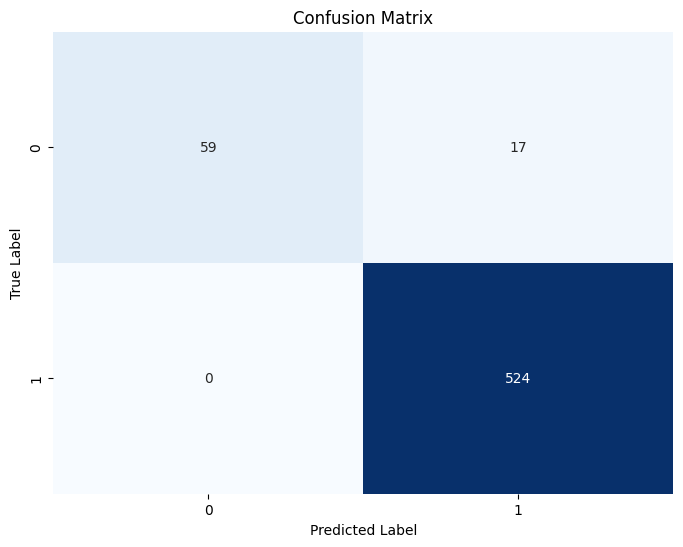

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

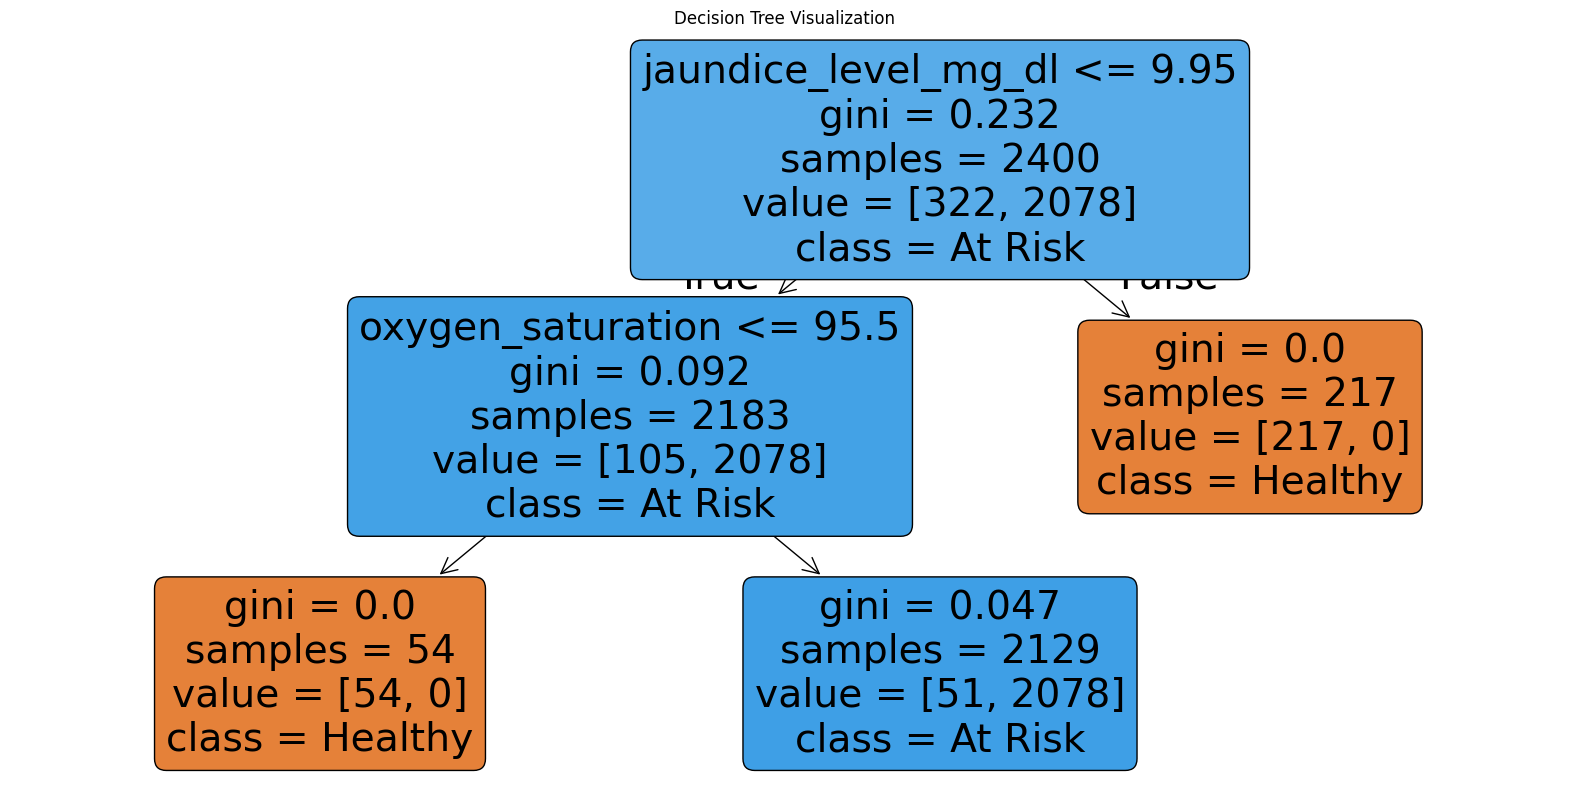

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Healthy', 'At Risk'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()